In [1]:
import math
import drawSvg as draw
from drawSvg import Drawing
from hyperbolic import euclid, util
from hyperbolic.poincare.shapes import *
from hyperbolic.poincare import Transform

In [2]:
def scale_on_disk(x,y):
    distance_from_center = math.sqrt( x**2 + y**2 )
    scale = (1-distance_from_center**2)/2
    return scale

#Function for adding Lorentz Boosts:
def hyperbolic_disk_walk(x,y,heading,length,step_size):
    n = (int)(length/step_size)
    for i in range(0,n):
        distance_from_center = math.sqrt( x**2 + y**2 )
        relative_heading = heading - math.atan2(y,x)
        scale = (1-distance_from_center**2)/2
        x = x+scale*step_size*math.cos(heading)
        y = y+scale*step_size*math.sin(heading)
        heading = heading - step_size*distance_from_center*math.sin(relative_heading)
    return (x,y,heading,scale)

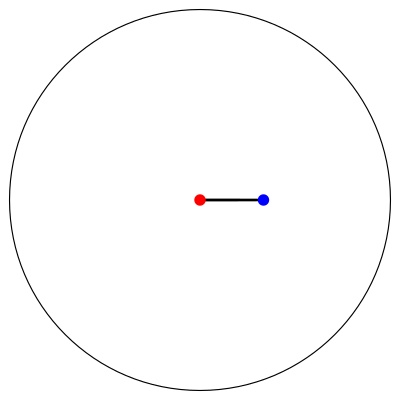

In [3]:
#PAIR of frame-grids
#Draw the Poincare Disk:
d = Drawing(2.1, 2.1, origin='center')
d.draw(euclid.shapes.Circle(0,0,1), fill='none', stroke_width=0.006, stroke='black')

xstart = 0
ystart = 0

A = Point(xstart,ystart)

(xend,yend,heading,scale) = hyperbolic_disk_walk(xstart,ystart,0,math.log(2),0.0005)

B = Point(xend,yend)

s = Line.fromPoints(*A, *B, segment=True)
#p = s.makePerpendicular(*center)

    


d.draw(s, hwidth=0.03, fill='black')

d.draw(A, radius=0.03, fill='red')
d.draw(B, radius=0.03, fill='blue')
#d.draw(p, hwidth=0.05, fill='black')


d.setRenderSize(w=400)
d.saveSvg('generated images/interlacedPair.svg')
d

In [4]:
#TREE of frame-grids
#Draw the Poincare Disk:
d = Drawing(2.1, 2.1, origin='center')
d.draw(euclid.shapes.Circle(0,0,1), fill='none', stroke_width=0.006, stroke='black')

N = 8
X = 0
Y = 0
Heading = 0
point_radius = 0.015
line_width = 0.0075


A = Point(X,Y) #central point
d.draw(A, radius = point_radius*scale_on_disk(X,Y), fill='black')


for CD in range(0,4): #Four cardinal directions
    
    Start = ( X , Y , Heading+CD*math.pi/2 )
    (x,y,heading) = Start
    
    (x,y,heading,scale) = hyperbolic_disk_walk(x,y,heading,math.log(2),0.0005)
    
    B = Point(x,y)
    d.draw(B, radius = point_radius*scale_on_disk(x,y) , fill='black')
    
    A = Point(X,Y) #central point
    s = Line.fromPoints(*A, *B, segment=True)
    d.draw(s, hwidth=line_width, fill='black')      
    
    endstates = [(x,y,heading)]
    
    
    for i in range(1,N): 
        
        startstates = endstates[:]
        endstates.clear()
        
        for start in startstates:
            
            (x,y,heading) = start
            A = Point(x,y)
            d.draw(A, radius = point_radius*scale_on_disk(x,y), fill='black')
            
            for cd in range(-1,2): #three further cardinal directions
                (x,y,heading) = start
                heading = heading + cd*math.pi/2
                (x,y,heading,scale) = hyperbolic_disk_walk(x,y,heading,math.log(2),0.0005)
                
                B = Point(x,y)
                d.draw(B, radius = point_radius*scale_on_disk(x,y) , fill='black')
                
                s = Line.fromPoints(*A, *B, segment=True)
                d.draw(s, hwidth=line_width, fill='black')                 
                
                endstates.append((x,y,heading))
        
        
    
d.setRenderSize(w=800)
d.saveSvg('generated images/N_{}.svg'.format(N))
d

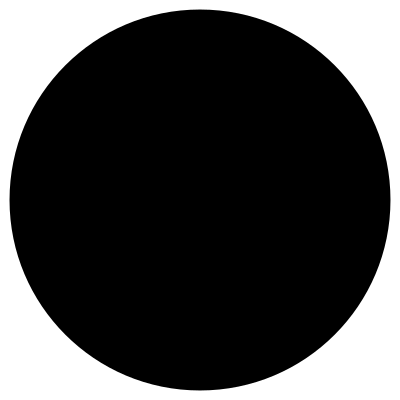

In [5]:
#Filling the entire Poincare Disk

d = Drawing(2.1, 2.1, origin='center')
A = Point(0,0)
d.draw(A, radius=1, fill='black')
d.setRenderSize(w=400)
d.saveSvg('generated images/N_infinite.svg')
d